<a href="https://colab.research.google.com/github/kartik-das/Data-Analysis/blob/master/Analysis_on_Wine_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Kartik Das


In [ ]:
'''
Dataset description:
11 features of 2000 different types of wines
Output: quality as a score
Categorized as follows:
quality: 6 and 7 as “average” ; 8 as “good” ; 3 and 4 and 5 as “poor”
'''

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset.csv',sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.24,0.19,7.7,0.045,53.0,176.0,0.99580,3.17,0.38,9.500000,5
1,5.3,0.76,0.03,2.7,0.043,27.0,93.0,0.99320,3.34,0.38,9.200000,5
2,6.6,0.22,0.53,15.1,0.052,22.0,136.0,0.99860,2.94,0.35,9.400000,5
3,6.6,0.22,0.53,15.1,0.052,22.0,136.0,0.99860,2.94,0.35,9.400000,5
4,8.4,0.28,0.40,8.9,0.048,33.0,146.0,0.99880,3.40,0.46,9.300000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7.0,0.36,0.25,5.7,0.015,14.0,73.0,0.98963,2.82,0.59,13.200000,6
1996,6.4,0.31,0.28,2.5,0.039,34.0,137.0,0.98946,3.22,0.38,12.700000,6
1997,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5
1998,7.4,0.16,0.30,1.4,0.064,34.0,166.0,0.99136,3.11,0.42,11.433333,6


In [ ]:
#Problem 1: Do we require all the 11 features to predict the quality?

In [ ]:
data.quality.value_counts()

6    874
5    595
7    384
8     77
4     66
3      4
Name: quality, dtype: int64

In [ ]:
for i in range(len(data.quality)):
    if(data.quality[i] == 6 or data.quality[i] == 7):
        data.quality[i] = 'average'
    elif(data.quality[i] == 5 or data.quality[i] == 4 or data.quality[i] == 3):
        data.quality[i] = 'poor'
    else:
        data.quality[i] = 'good'

<ipython-input-147-bef8c9a5eba7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.quality[i] = 'poor'


In [ ]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.24,0.19,7.7,0.045,53.0,176.0,0.9958,3.17,0.38,9.5,poor
1,5.3,0.76,0.03,2.7,0.043,27.0,93.0,0.9932,3.34,0.38,9.2,poor
2,6.6,0.22,0.53,15.1,0.052,22.0,136.0,0.9986,2.94,0.35,9.4,poor
3,6.6,0.22,0.53,15.1,0.052,22.0,136.0,0.9986,2.94,0.35,9.4,poor
4,8.4,0.28,0.40,8.9,0.048,33.0,146.0,0.9988,3.40,0.46,9.3,poor
5,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.9953,3.19,0.40,9.1,poor
6,6.7,0.24,0.33,12.3,0.046,31.0,145.0,0.9983,3.36,0.40,9.5,poor
7,7.4,0.18,0.36,13.1,0.056,72.0,163.0,1.0000,3.42,0.35,9.1,average
8,6.0,0.16,0.30,6.7,0.043,43.0,153.0,0.9951,3.63,0.46,10.6,poor
9,6.7,0.24,0.33,12.3,0.046,31.0,145.0,0.9983,3.36,0.40,9.5,poor


In [ ]:
data.quality.value_counts()

average    1258
poor        665
good         77
Name: quality, dtype: int64

In [ ]:

for i in range(len(data.quality)):
    if(data.quality[i] == 'average'):
        data.quality[i] = 1
    elif(data.quality[i] == 'poor'):
        data.quality[i] = 0
    else:
        data.quality[i] = 2

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.24,0.19,7.7,0.045,53.0,176.0,0.9958,3.17,0.38,9.5,0
1,5.3,0.76,0.03,2.7,0.043,27.0,93.0,0.9932,3.34,0.38,9.2,0
2,6.6,0.22,0.53,15.1,0.052,22.0,136.0,0.9986,2.94,0.35,9.4,0
3,6.6,0.22,0.53,15.1,0.052,22.0,136.0,0.9986,2.94,0.35,9.4,0
4,8.4,0.28,0.40,8.9,0.048,33.0,146.0,0.9988,3.40,0.46,9.3,0


<ipython-input-152-38ede3e41016>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = data.corr()


<Axes: >

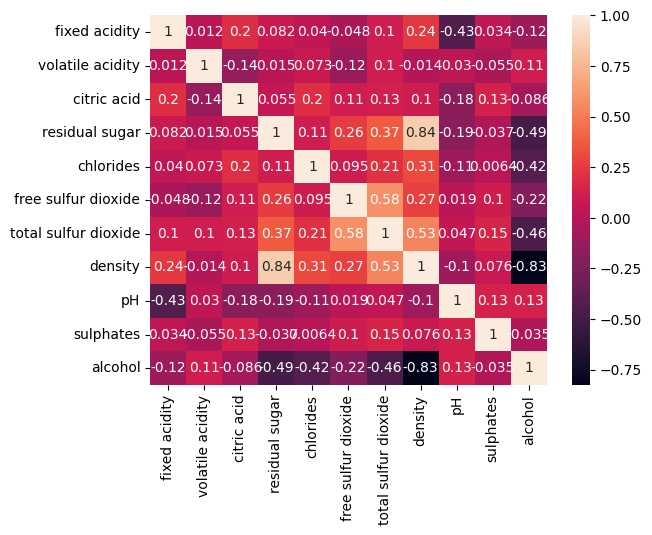

In [ ]:
#correlation matrix
import seaborn as sns
matrix = data.corr()
sns.heatmap(matrix, annot=True)

In [ ]:
from scipy.stats import f_oneway


group_a = data[data['quality'] == 0][['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
group_b = data[data['quality'] == 1][['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
group_c = data[data['quality'] == 2][['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]

# ANOVA test for each feature
for feature in ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']:
    f_statistic, p_value = f_oneway(group_a[feature], group_b[feature], group_c[feature])
    print(f"ANOVA test results for {feature}:")
    if p_value < 0.05:
        print("There is a significant difference in means between the groups.")
    else:
        print("There is no significant difference in means between the groups.")
    print()

ANOVA test results for fixed acidity:
There is a significant difference in means between the groups.

ANOVA test results for volatile acidity:
There is a significant difference in means between the groups.

ANOVA test results for citric acid:
There is no significant difference in means between the groups.

ANOVA test results for residual sugar:
There is a significant difference in means between the groups.

ANOVA test results for chlorides:
There is a significant difference in means between the groups.

ANOVA test results for free sulfur dioxide:
There is no significant difference in means between the groups.

ANOVA test results for total sulfur dioxide:
There is a significant difference in means between the groups.

ANOVA test results for density:
There is a significant difference in means between the groups.

ANOVA test results for pH:
There is no significant difference in means between the groups.

ANOVA test results for sulphates:
There is no significant difference in means between

In [ ]:
#Problem 2 : Can we identify good and poor wines?
#[Outlier Detection]

In [ ]:
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

In [ ]:
x = data.drop("quality", inplace=False, axis=1)
X = np.array(x)
X

array([[ 7.2       ,  0.24      ,  0.19      , ...,  3.17      ,
         0.38      ,  9.5       ],
       [ 5.3       ,  0.76      ,  0.03      , ...,  3.34      ,
         0.38      ,  9.2       ],
       [ 6.6       ,  0.22      ,  0.53      , ...,  2.94      ,
         0.35      ,  9.4       ],
       ...,
       [ 7.3       ,  0.28      ,  0.35      , ...,  3.18      ,
         0.47      , 10.7       ],
       [ 7.4       ,  0.16      ,  0.3       , ...,  3.11      ,
         0.42      , 11.43333333],
       [ 6.4       ,  0.31      ,  0.27      , ...,  3.27      ,
         0.45      , 11.1       ]])

In [ ]:
# The covariance matrix of the dataset
covariance_matrix = np.cov(X.T)

# The inverse of the covariance matrix
inv_covariance_matrix = np.linalg.inv(covariance_matrix)

# The mean of the dataset
mean_vector = np.mean(X, axis=0)

# Initializing an empty array to store the Mahalanobis distances
mahalanobis_distances = np.zeros(X.shape[0])

# The Mahalanobis distance for each observation
for i, observation in enumerate(X):
    mahalanobis_distances[i] = mahalanobis(observation, mean_vector, inv_covariance_matrix)

In [ ]:
# Setting the desired significance level (e.g., 0.05 for a 95% confidence level)
alpha = 0.05

# Determining the critical value for the chi-squared distribution with 'm' degrees of freedom
chi2_critical_value = chi2.ppf(1 - alpha, df=11)

# Setting the threshold for outlier detection
threshold = chi2_critical_value

In [ ]:
# The indices of the observations that exceed the threshold
outlier_indices = np.where(mahalanobis_distances > threshold)[0]

# The indices of the outliers
print("Outlier indices:", outlier_indices)

Outlier indices: []


In [ ]:
#Problem 3 : Comparing two different types of Classification methods

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_data = data[['fixed acidity','volatile acidity','residual sugar','chlorides','total sulfur dioxide','alcohol']]
y_data = data['quality']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1400, 6), (600, 6), (1400,), (600,))

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [ ]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train, y_train)


SVC(kernel='linear')

In [ ]:
y_pred = svm_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.705

In [ ]:
precision_score(y_test,y_pred,average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6712767527175753

In [ ]:
recall_score(y_test,y_pred,average='weighted')

0.705

In [ ]:
f1_score(y_test,y_pred,average='weighted')

0.6819340403178148

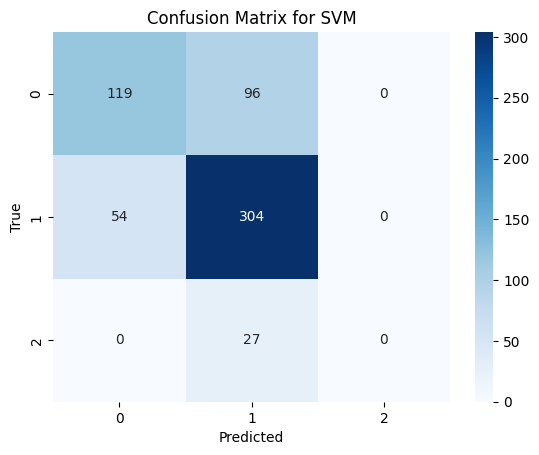

In [ ]:

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')


plt.show()

In [ ]:
rf  = RandomForestClassifier(n_estimators=100)
model_ran = rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8

In [ ]:
precision_score(y_test,y_pred,average='weighted')

0.8048931623931624

In [ ]:
recall_score(y_test,y_pred,average='weighted')

0.8

In [ ]:
f1_score(y_test,y_pred,average='weighted')

0.7946666562187469

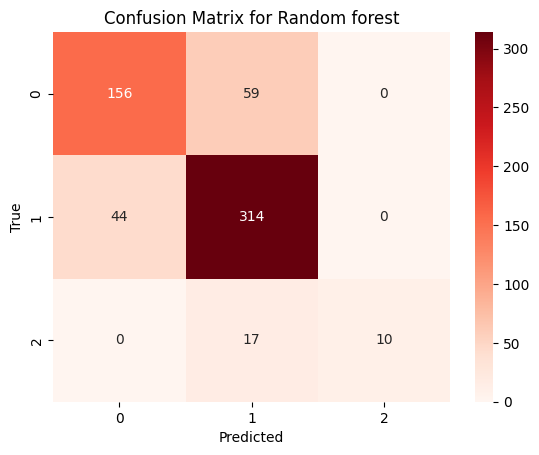

In [ ]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random forest')


plt.show()